# Introduction

**This notebook provides information how to train our custom data on Google Colob using Darknet Yolov3**

*  Introduction
*  Labeling images
*  Importing Darknet YOLOV3
*  Testing Darknet YOLOV3
*  Settings Darknet for training Custom data
*  Start Training on Custom data
*  Testing 

Here is the link first dowwnload your computer, use LabelImg tool and then upload to your Google Drive. Link of animal images and labelImg tool: https://drive.google.com/file/d/17Wtsuj_vKqtLiEwRyrdEhrb8RGPB4tMd/view?usp=sharing


**Important tools and libraries**

*  Custom data
*  LabelImg annotation tool
*  Darknet
*  OpenCV
*  Matplotlib.pyplot

First we collected 50 images of buffalo, then labeled them using LabelImg annotation tool. After finishing labeling, we zipped imgs.jpg and label.txt files to upload Google Drive.

On Colab first we changed Hardware accelerator to GPU (Runtime - change runtime - Notebook settings - Hardware accelerator - select ***GPU***). Then check it with below code: 
* !nvidia-smi

When it comes to import Darknet, used below codes:

* !git clone https://github.com/AlexeyAB/darknet
* %cd darknet
* !sed -i 's/OPENCV=0/OPENCV=1/' Makefile
* !sed -i 's/GPU=0/GPU=1/' Makefile
* !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
* !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
* !/usr/local/cuda/bin/nvcc --version
* !make
* !wget https://pjreddie.com/media/files/yolov3.weights

Then tested Darknet YOLOV3 using opencv, matplotlib libraries and below code:

* !./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/person.jpg











# Labeling images

**LabelImg annotation tool**

*  Run LabelImg.exe
*  Select ***Open Dir*** button
*  Select data folder (C:\Users\admin\Desktop\Animal\Animals)
*  Change ***PascalVoc*** to ***YOLO** by pressing that buttons on left side
*  Then press ***Create RectBox*** button
*  Make rect box around buffalo img
*  After that ***labelImg*** notification pop up near your mouse
*  Type class name (buffalo) 
*  Then press ***Save*** button
*  After saving, going to next img press ***Next Image*** button
*  Repeat this process for all 50 buffalo images
*  **Be sure** .txt file should be [category number]
[bounding box left X] [bounding box top Y] [bounding box right X] [bounding box bottom Y]
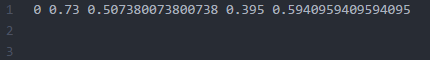

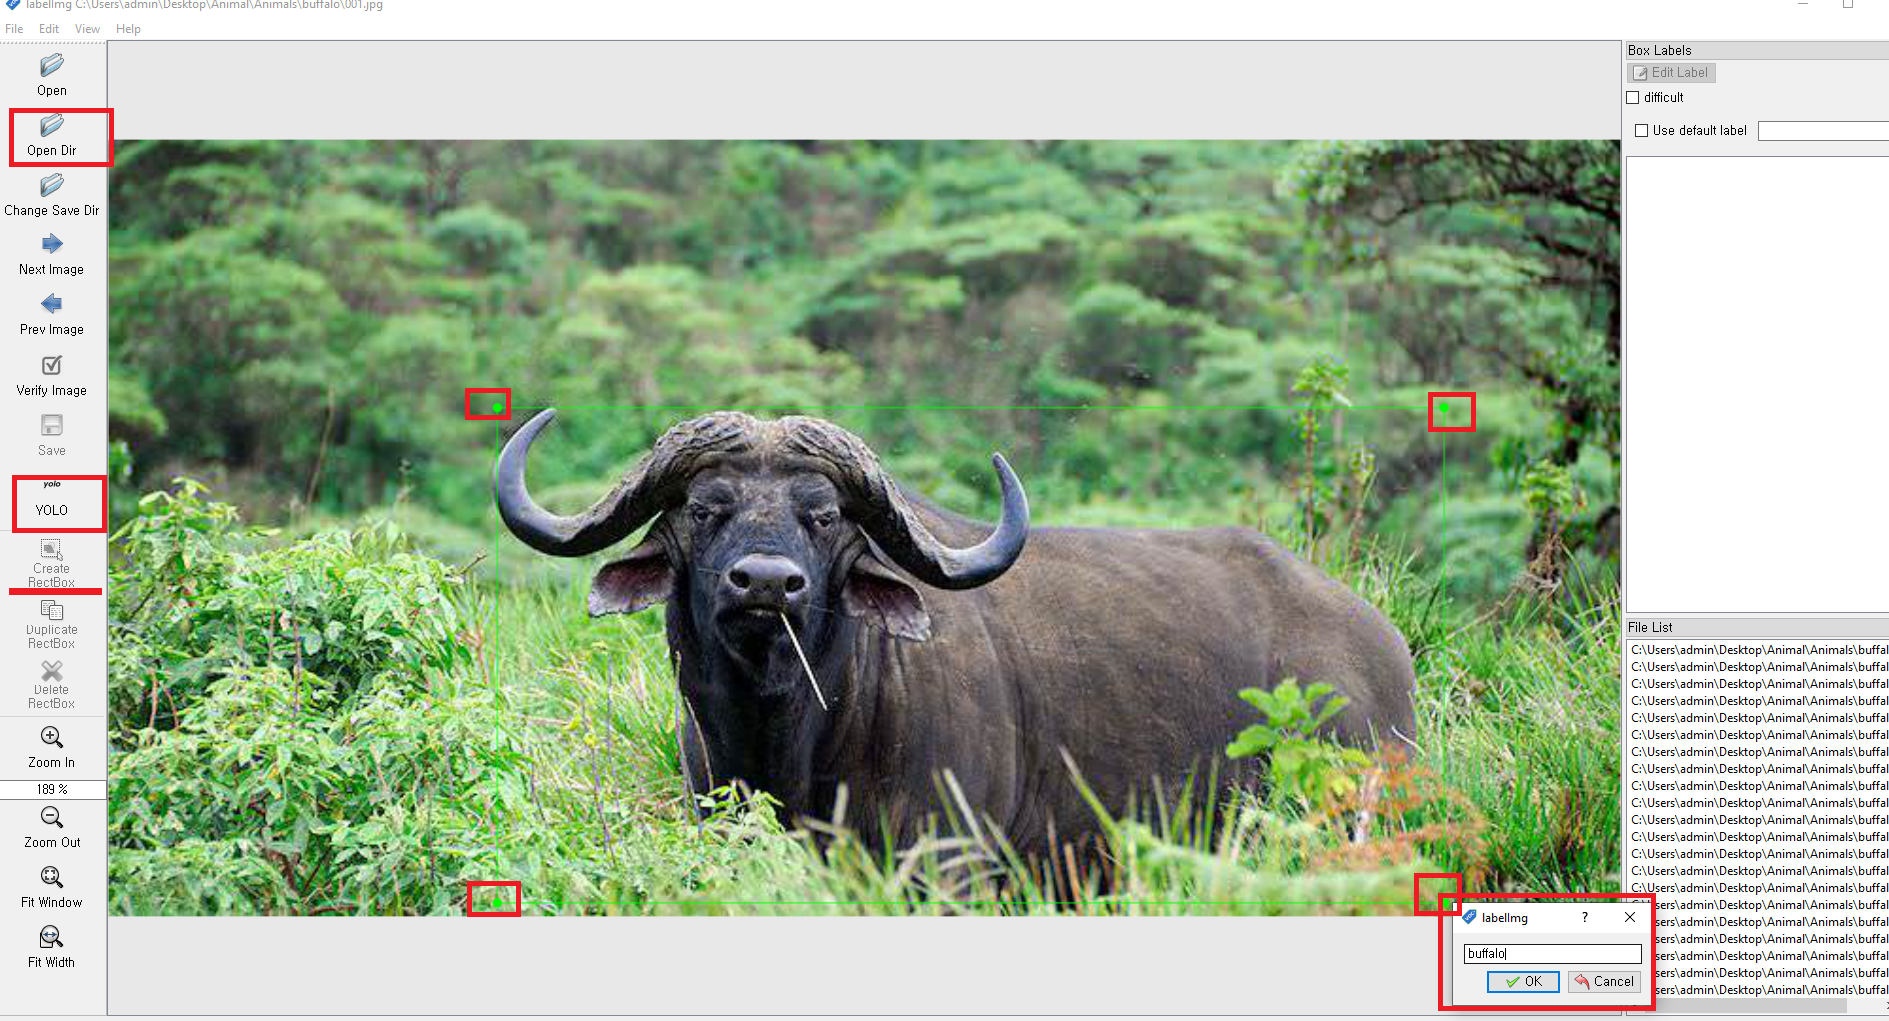

**Unzipping files**

Unzip buffalo folder that contains buffalo imgs and label.txt files. Then upload it to Google Drive for using on Colab later.

# Setting up Darknet

**Checking GPU**

In [ ]:
!nvidia-smi

Thu Dec  2 21:49:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Importing darknet from github**

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15368, done.
remote: Total 15368 (delta 0), reused 0 (delta 0), pack-reused 15368
Receiving objects: 100% (15368/15368), 13.98 MiB | 18.17 MiB/s, done.
Resolving deltas: 100% (10335/10335), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!/usr/local/cuda/bin/nvcc --version
!make

/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void*

**Downloading pre-trained weights**

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-12-02 21:51:28--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  62.6MB/s    in 4.0s    

2021-12-02 21:51:33 (58.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



**Test Darknet**

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights /content/b.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.59

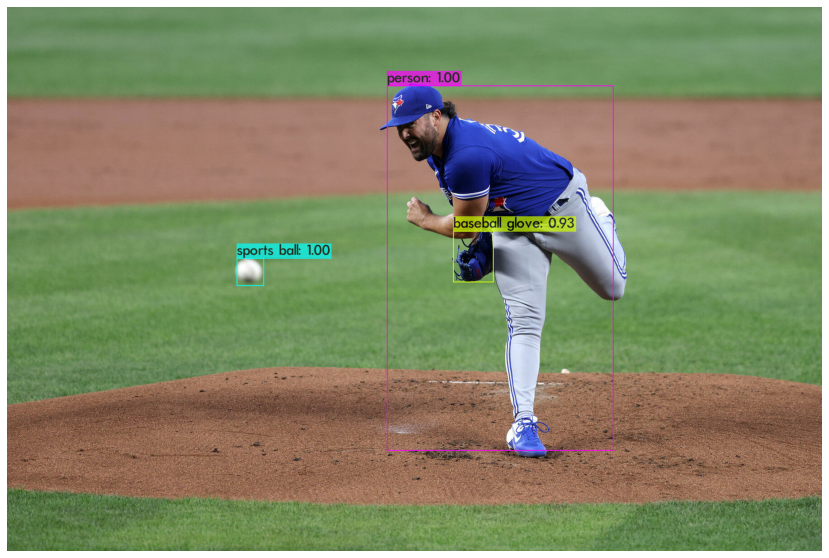

In [ ]:
imShow('predictions.jpg')

# Training our own data

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import our own data from Google Drive**

In [ ]:
!unzip '/content/gdrive/My Drive/darknet/Animals_Labeled.zip' -d '/content' # put your data path

Archive:  /content/gdrive/My Drive/darknet/Animals_Labeled.zip
   creating: /content/Animal_Data/buffalo/
  inflating: /content/Animal_Data/buffalo/001.jpg  
  inflating: /content/Animal_Data/buffalo/001.txt  
  inflating: /content/Animal_Data/buffalo/002.jpg  
  inflating: /content/Animal_Data/buffalo/002.txt  
  inflating: /content/Animal_Data/buffalo/003.jpg  
  inflating: /content/Animal_Data/buffalo/003.txt  
  inflating: /content/Animal_Data/buffalo/004.jpg  
  inflating: /content/Animal_Data/buffalo/004.txt  
  inflating: /content/Animal_Data/buffalo/005.jpg  
  inflating: /content/Animal_Data/buffalo/005.txt  
  inflating: /content/Animal_Data/buffalo/006.jpg  
  inflating: /content/Animal_Data/buffalo/006.txt  
  inflating: /content/Animal_Data/buffalo/007.jpg  
  inflating: /content/Animal_Data/buffalo/007.txt  
  inflating: /content/Animal_Data/buffalo/008.jpg  
  inflating: /content/Animal_Data/buffalo/008.txt  
  inflating: /content/Animal_Data/buffalo/009.jpg  
  inflatin

# Before Training
**Download pretrained weights**

For training, we use convolution weights that are pretrained on the ImageNet dataset. Download the weight file inside the data folder using the command given below

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

 **Yolo-obj.cfg**

*  First, create the yolo-obj.cfg file inside darknet/cfg folder, and then copy and paste the content from yolov3.cfg (it can be found in the same darknet/cfg folder).

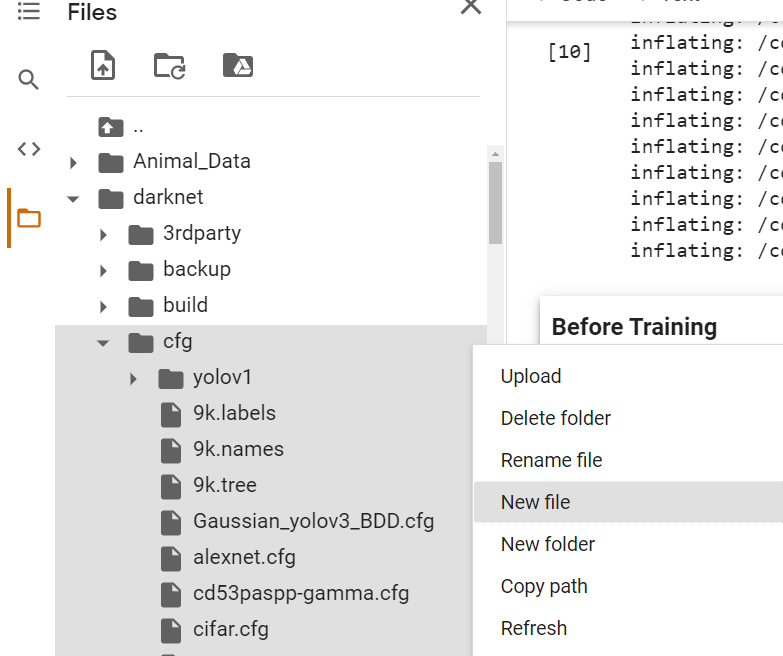

* Now we make changes in yolo-obj-cfg file.
* We are using 1 classes so make classes=1.
* Check for filters=255, you will find 3 results in [convolutional] section just before [yolo] section. Change it with the result of the following calculation,  ***filters=(classes + 5)x3***.
*  So for 1 class, it will be filters=18 and for 2 classes it will be filters=21

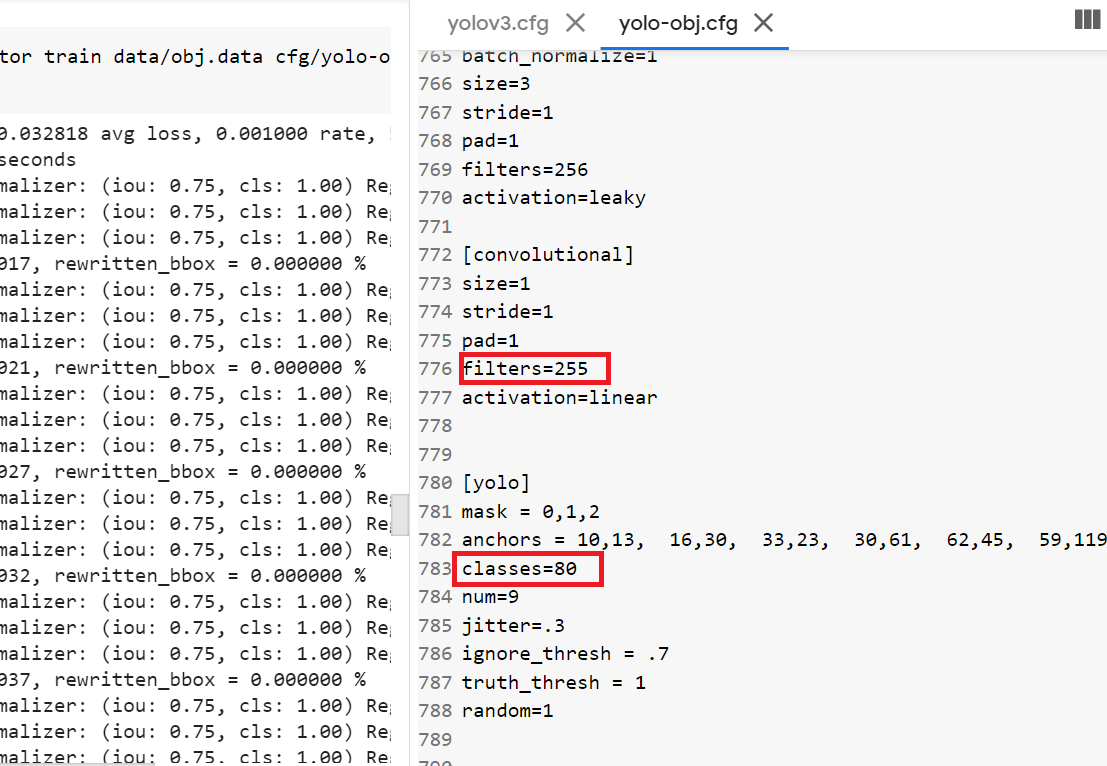

*  By default width=416 and height = 416, we can keep it as it is but if we want to change it then make sure that the number should be a multiple of 32.
*  It is the maximum number of batches you want to run for training.  ***max_batches = (number of classes) * 2000***. This can’t be less than 4000 even you are using 1 class.
*  Steps should be 80% and 90% of the max_batches. 4000 --- 3200, 3600


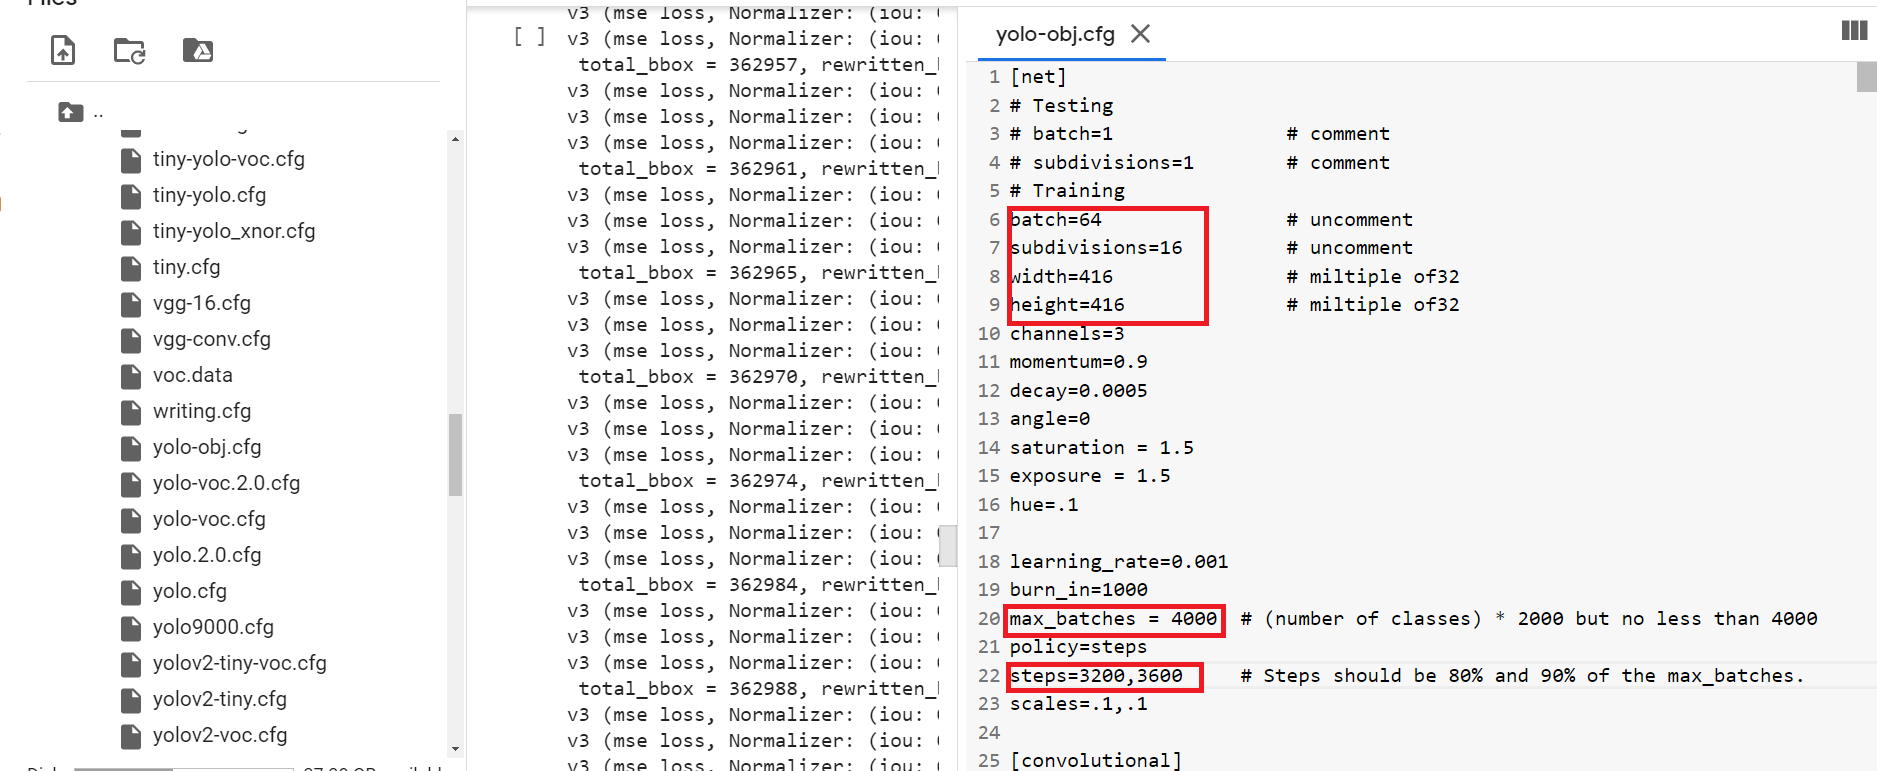

**Train & Test split**

*  For training and testing, we need to provide the lists of images in the text files.
*  Create two files inside the data folder, train.txt, and test.txt. These files will have the path of the images and path should relative to the darknet executable. If the relative path doesn’t work then you can provide the full path also
*  Put 80% of the total images into the train.txt and rest 20% into test.txt, but make sure there should not be any common image in these files.
*  Then check train.txt and test.txt files. If it is empty run one more time below train&test split code

In [ ]:
# Train & Test split code 
import glob, os

data_dir = '/content/Animal_Data/buffalo'

# Percentage of images to be used for the test set
percentage_test = 20;

# Create and/or truncate train.txt and test.txt inside darknet/data folder
file_train = open('data/train.txt', 'w')
file_test = open('data/test.txt', 'w')

# Populate train.txt and test.txt
counter = 1
index_test = round(100 / percentage_test)
for pathAndFilename in glob.iglob(os.path.join(data_dir, "*.jpg")):
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))

    if counter == index_test:
        counter = 1
        file_test.write(data_dir + "/" + title + '.jpg' + "\n")
    else:
        file_train.write(data_dir + "/" + title + '.jpg' + "\n")
        counter = counter + 1

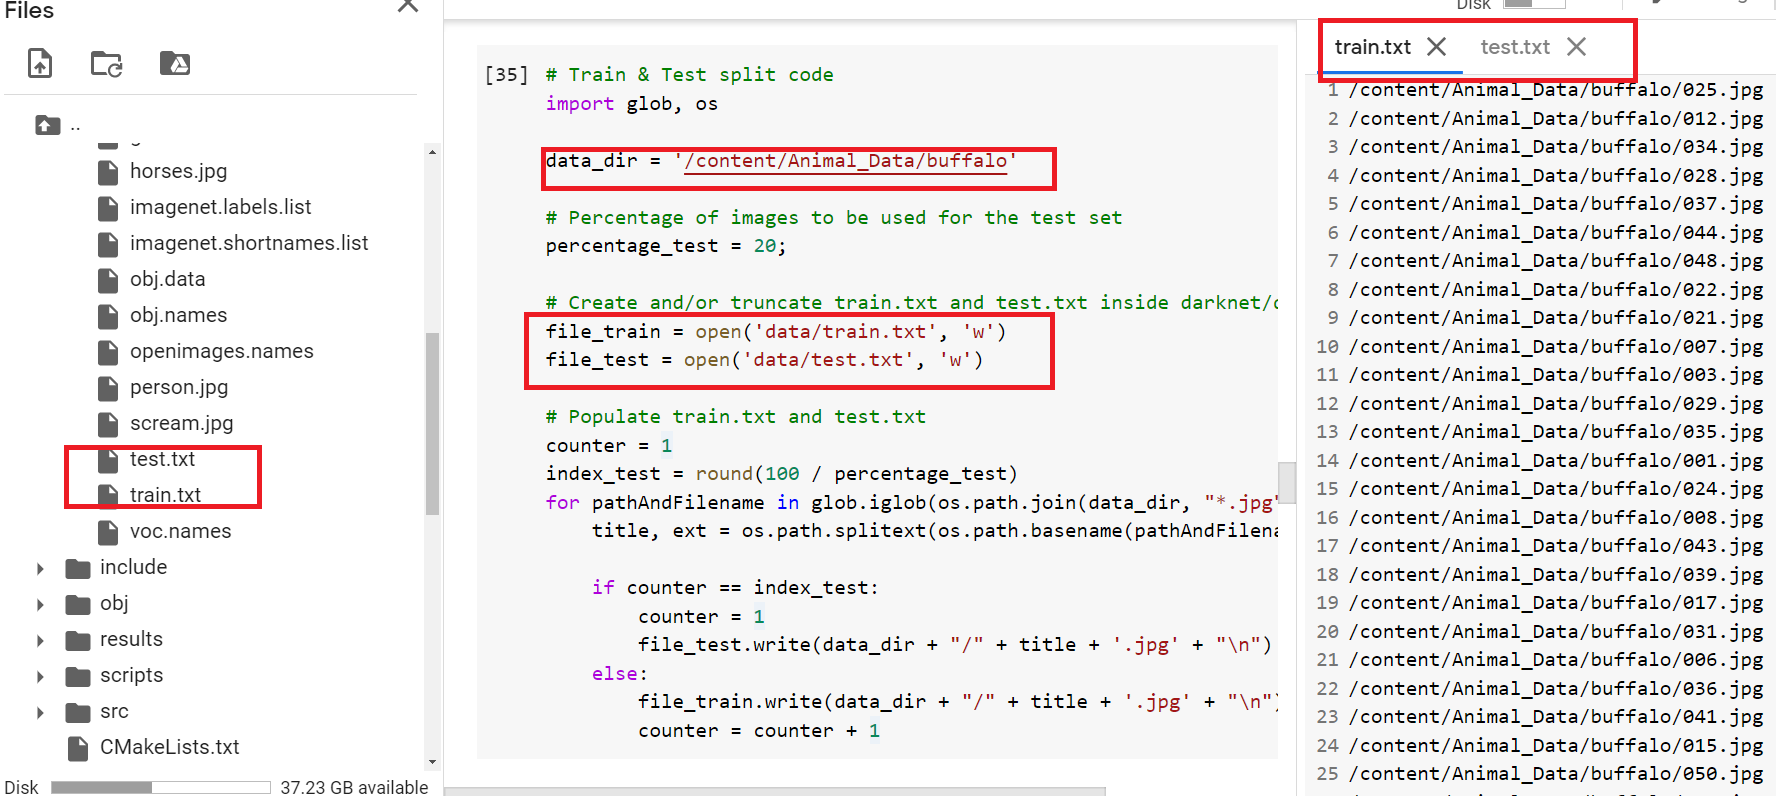

**obj.names**
*  We need to create a file that will have the name of all the classes (like classes.txt), so just create obj.names file inside the data folder. The structure of the file should be as given below.

1| elephant 

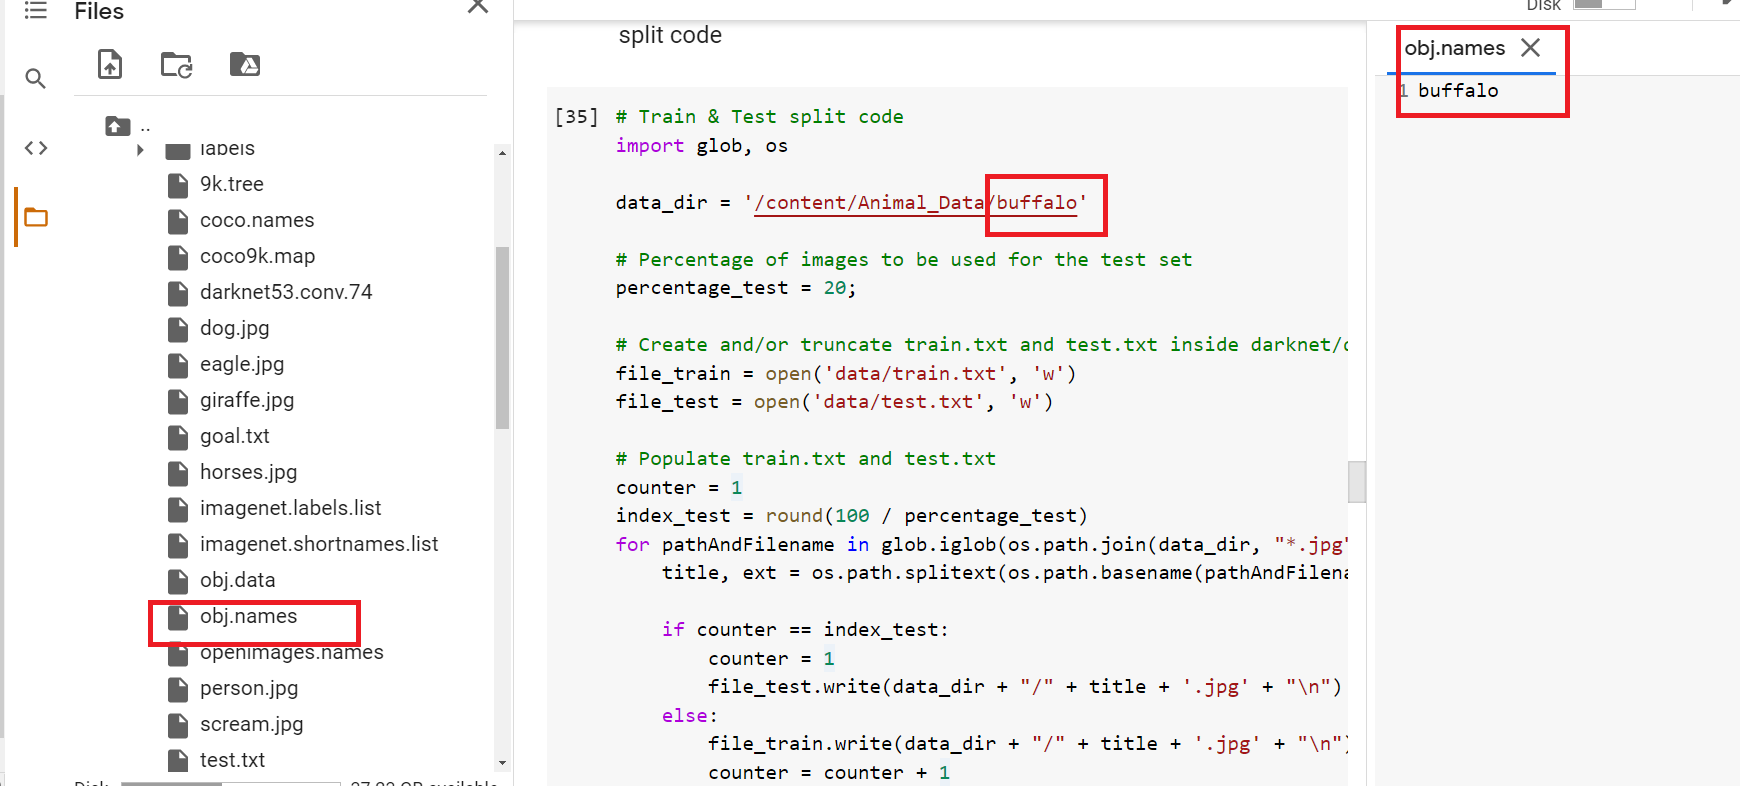

**obj.data**

This file contains the paths of other files and info about the number of classes. Create obj.data inside the data folder and save the contents given below.
*  First line is just number of classes of objects.
*  Second, third and fourth lines contain the paths of the other files, but again these paths should be relative to the darknet executable.
*  Backup is the path where the weights will be stored during training, you can find it inside the darknet repository. After every 100 iterations, the weights will be stored.
*  ***obj.data***
*  classes= 1
*  train  = /content/darknet/data/train.txt 
*  valid  = /content/darknet/data/test.txt
*  names  = /content/darknet/data/obj.names
*  backup = backup/


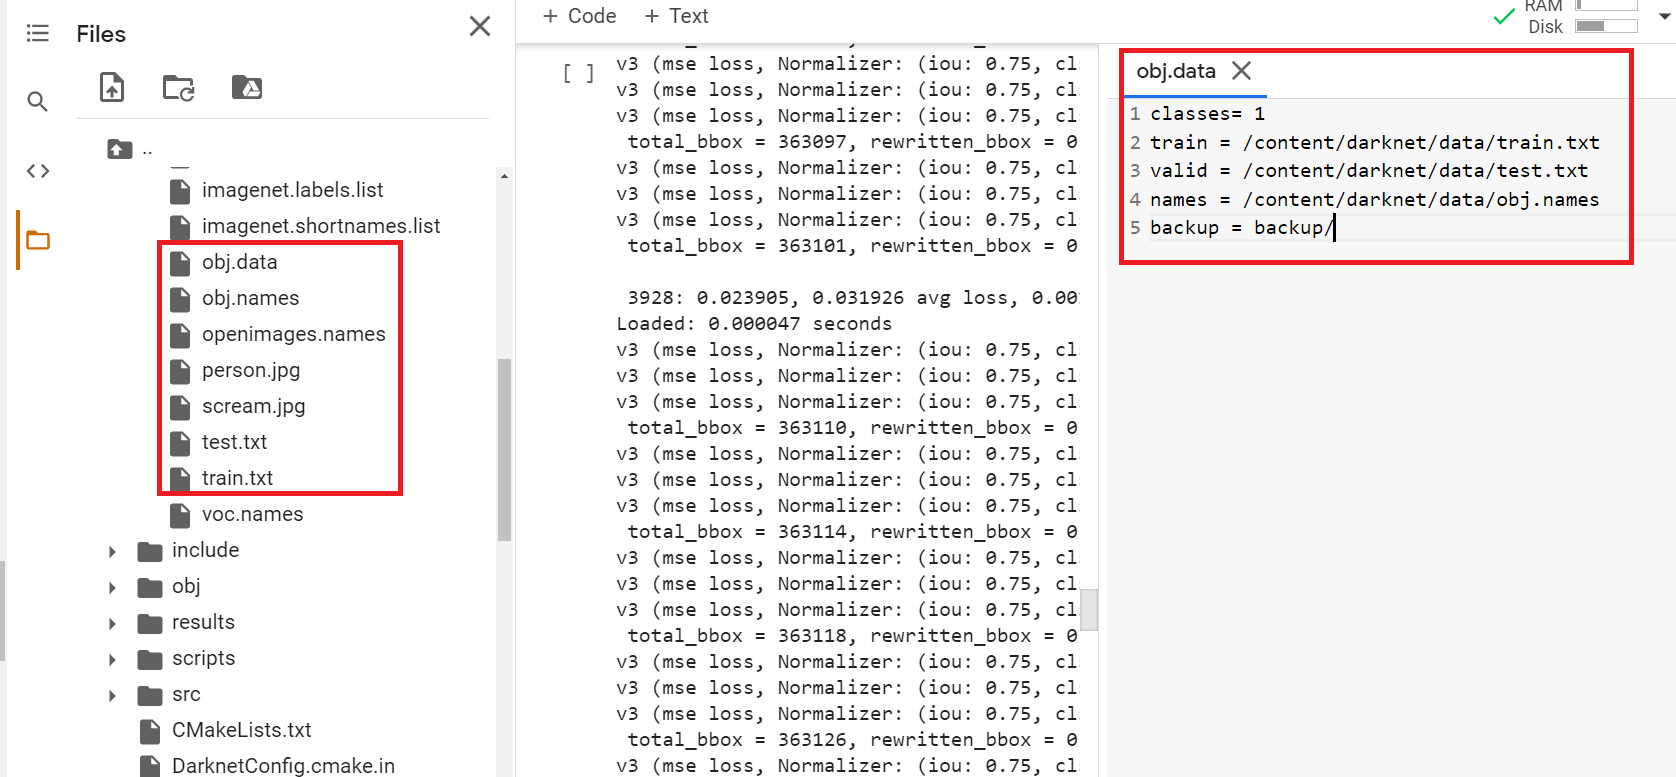

**Train data**

In [ ]:
! ./darknet detector train data/obj.data cfg/yolo-obj.cfg data/darknet53.conv.74 -dont_show


Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 139837, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.886296, GIOU: 0.885730), Class: 0.999155, Obj: 0.930360, No Obj: 0.004023, .5R: 1.000000, .75R: 1.000000, count: 6, class_loss = 0.040585, iou_loss = 0.056680, total_loss = 0.097265 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj:

# Testing

https://github.com/mathieuorhan/darknet/blob/master/src/detector.c

In [ ]:
!./darknet detector test data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights /content/buffalo_3.jpg


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, ou

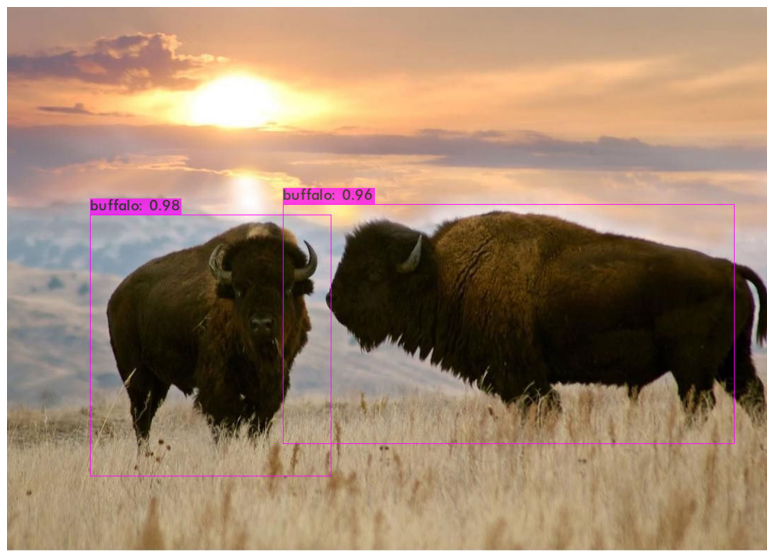

In [ ]:
imShow('predictions.jpg')